In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
# Set up matplotlib and use a nicer set of plot parameters
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
cmap = cm.jet
import matplotlib.colors as colors
%matplotlib inline

In [3]:
import os
import sys

In [4]:
import astropy
import astropy.units as u
from astropy.io import fits

In [5]:
from libpysynphotgridsed import *

# Open SED file

In [6]:
file_sed_fits='sedgrid_phoenixmodels_good.fits'

In [7]:
hdul = fits.open(file_sed_fits)
data = hdul[0].data

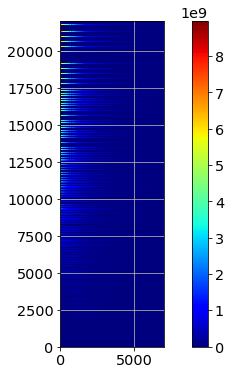

In [8]:
plt.figure()   
img=plt.imshow(data[1:,index_spec:],origin='lower',cmap='jet')
plt.colorbar(img)
plt.grid(True)
plt.show()

# Magnitudes

In [9]:
file_cfhtmag="phoenix_snlsmagnit_Noextinct.csv"

In [10]:
df= pd.read_csv(file_cfhtmag,index_col=0)

In [11]:
df

,idxcat,u,g,r,i,z
0,3,-61.410835,-65.235086,-65.941005,-66.313184,-65.602593
1,4,-63.050359,-66.283926,-66.934118,-67.285028,-66.567059
2,5,-62.853105,-66.297985,-66.843842,-67.250098,-66.547240
3,6,-61.672658,-65.816894,-66.639241,-66.937294,-66.247580
4,7,-61.243375,-65.590380,-66.492643,-66.811797,-66.128310
5,8,-62.551953,-66.004751,-66.614463,-67.248548,-66.602435
6,9,-63.531126,-66.409214,-66.865186,-67.160536,-66.433565
7,10,-63.472797,-66.447859,-66.971475,-67.271183,-66.540428
8,11,-62.637458,-66.079092,-66.590735,-66.908597,-66.203215
9,12,-63.238771,-66.371689,-66.889345,-67.198583,-66.478081


In [12]:
datamag=df.iloc[:,1:6].values
datamag_index=df.iloc[:,0].values

In [13]:
datamag

array([[-61.41083501, -65.23508583, -65.94100485, -66.31318359,
        -65.60259285],
       [-63.0503591 , -66.28392578, -66.93411803, -67.28502824,
        -66.56705901],
       [-62.85310463, -66.29798514, -66.84384175, -67.25009836,
        -66.54723956],
       ..., 
       [-73.8762448 , -74.67932808, -73.70028296, -73.14451236,
        -71.89465847],
       [-73.95502168, -74.7440694 , -73.74534699, -73.17851182,
        -71.92198387],
       [-74.01025277, -74.790786  , -73.78324119, -73.21017743,
        -71.95008166]])

In [14]:
datamag_index

array([    3,     4,     5, ..., 22070, 22071, 22072])

# Create the new container

In [15]:
data.shape

(22081, 7005)

In [16]:
newdata=np.zeros([data.shape[0],data.shape[1]+5])

In [17]:
newdata.shape

(22081, 7010)

In [18]:
newdata[:,0:index_mag]=data

In [19]:
newdata[datamag_index,index_mag:]=datamag

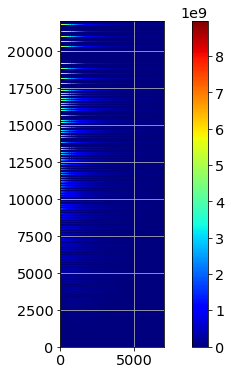

In [20]:
plt.figure()   
img=plt.imshow(newdata[1:,index_spec:],origin='lower',cmap='jet')
plt.colorbar(img)
plt.grid(True)
plt.show()

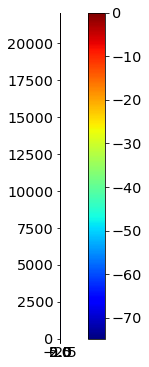

In [21]:
plt.figure()   
img=plt.imshow(newdata[1:,index_mag:],origin='lower',cmap='jet')
plt.colorbar(img)
plt.grid(True)
plt.show()

In [22]:
newdata[1:,index_mag:].shape

(22080, 5)

In [23]:
U_G=newdata[:,index_mag] - newdata[:,index_mag+1]
G_R=newdata[:,index_mag+1] - newdata[:,index_mag+2]
R_I=newdata[:,index_mag+2] - newdata[:,index_mag+3]
I_Z=newdata[:,index_mag+3] - newdata[:,index_mag+4]

In [24]:
all_temperatures=newdata[datamag_index,index_temp]
Z=all_temperatures

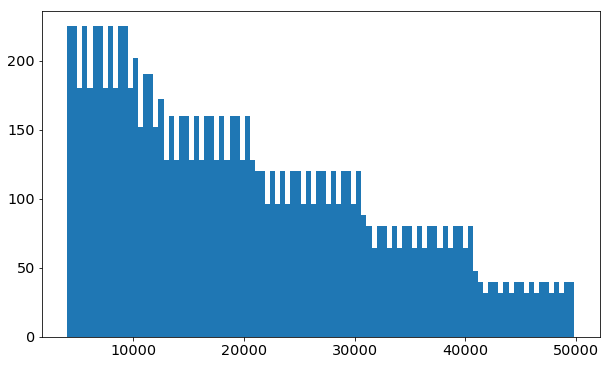

In [25]:
plt.hist(all_temperatures,bins=100);

In [26]:
all_gravity=newdata[datamag_index,index_logg]

In [27]:
all_metallicity=newdata[datamag_index,index_logz]

### Temperature plot

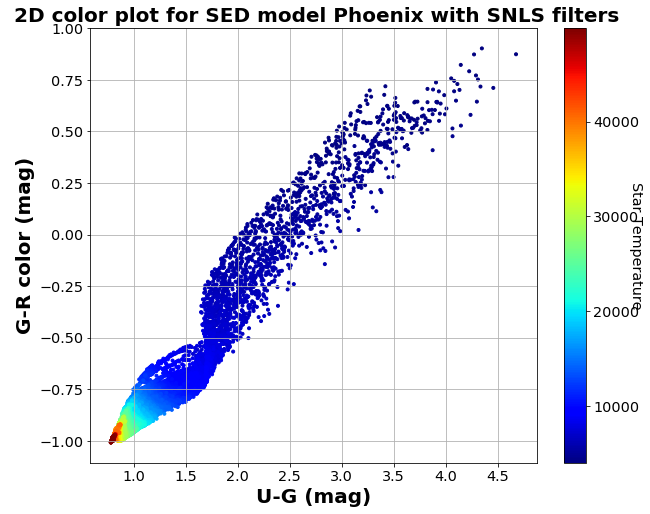

In [28]:
plt.figure(figsize=(10,8))
#plt.scatter(U_G[datamag_index], G_R[datamag_index],c=all_temperatures,norm=colors.LogNorm(),cmap='jet' )
plt.scatter(U_G[datamag_index], G_R[datamag_index],marker='.',c=all_temperatures,cmap='jet' )
cbar=plt.colorbar()
plt.grid()
xtitle='U-G (mag)'
ytitle='G-R color (mag)'
title=' 2D color plot for SED model Phoenix with SNLS filters'
plt.xlabel(xtitle,fontsize=20,weight='bold')
plt.ylabel(ytitle,fontsize=20,weight='bold')        
plt.title(title,fontsize=20,weight='bold')  
#cbar.set_ticks([1000., 5000.,10000.,50000.], update_ticks=True)
cbar.set_label('Star Temperature', rotation=270)

# put the major ticks at the middle of each cell

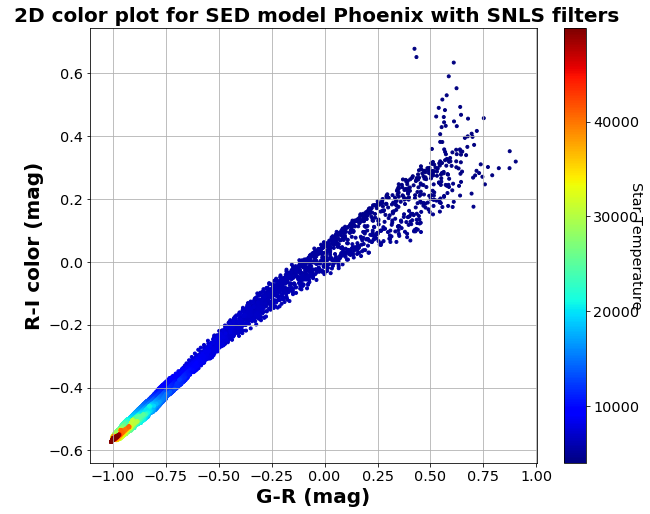

In [29]:
plt.figure(figsize=(10,8))
#plt.scatter(U_G[datamag_index], G_R[datamag_index],c=all_temperatures,norm=colors.LogNorm(),cmap='jet' )
plt.scatter(G_R[datamag_index], R_I[datamag_index],marker='.',c=all_temperatures,cmap='jet' )
cbar=plt.colorbar()
plt.grid()
xtitle='G-R (mag)'
ytitle='R-I color (mag)'
title=' 2D color plot for SED model Phoenix with SNLS filters'
plt.xlabel(xtitle,fontsize=20,weight='bold')
plt.ylabel(ytitle,fontsize=20,weight='bold')        
plt.title(title,fontsize=20,weight='bold')  
#cbar.set_ticks([1000., 5000.,10000.,50000.], update_ticks=True)
cbar.set_label('Star Temperature', rotation=270)

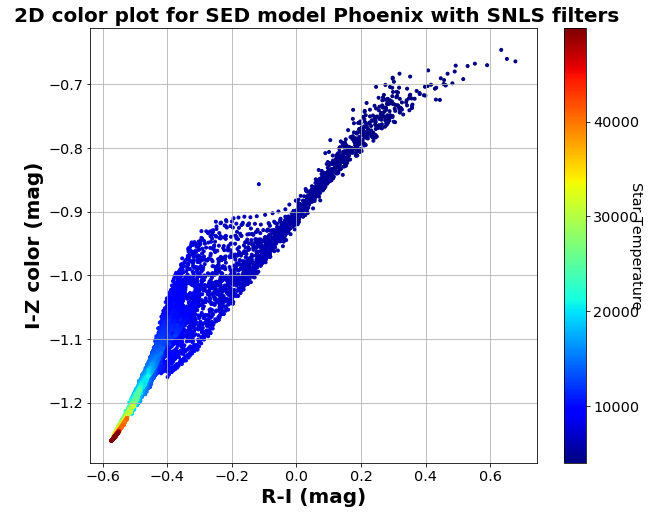

In [30]:
plt.figure(figsize=(10,8))
#plt.scatter(U_G[datamag_index], G_R[datamag_index],c=all_temperatures,norm=colors.LogNorm(),cmap='jet' )
plt.scatter(R_I[datamag_index], I_Z[datamag_index],marker='.',c=all_temperatures,cmap='jet' )
cbar=plt.colorbar()
plt.grid()
xtitle='R-I (mag)'
ytitle='I-Z color (mag)'
title=' 2D color plot for SED model Phoenix with SNLS filters'
plt.xlabel(xtitle,fontsize=20,weight='bold')
plt.ylabel(ytitle,fontsize=20,weight='bold')        
plt.title(title,fontsize=20,weight='bold')  
#cbar.set_ticks([1000., 5000.,10000.,50000.], update_ticks=True)
cbar.set_label('Star Temperature', rotation=270)

### Gravity plot

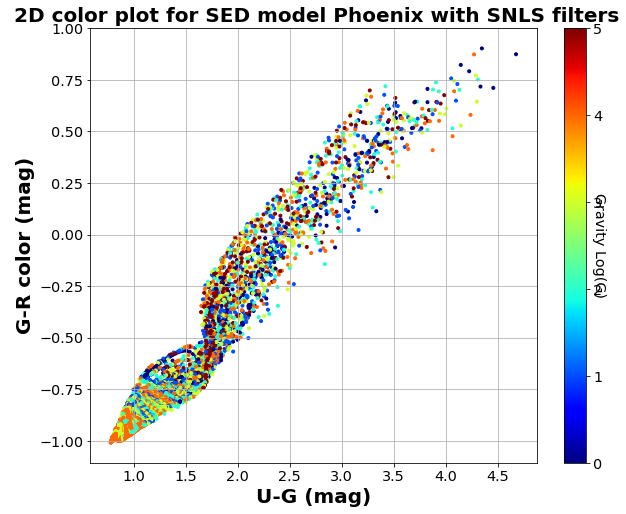

In [31]:
plt.figure(figsize=(10,8))
plt.scatter(U_G[datamag_index], G_R[datamag_index],c=all_gravity,marker='.',cmap='jet' )
cbar=plt.colorbar()
plt.grid()
xtitle='U-G (mag)'
ytitle='G-R color (mag)'
title=' 2D color plot for SED model Phoenix with SNLS filters'
plt.xlabel(xtitle,fontsize=20,weight='bold')
plt.ylabel(ytitle,fontsize=20,weight='bold')        
plt.title(title,fontsize=20,weight='bold')  
#cbar.ax.set_yticklabels([500.,1000.,])
cbar.set_label('Gravity Log(G)', rotation=270)

# put the major ticks at the middle of each cell

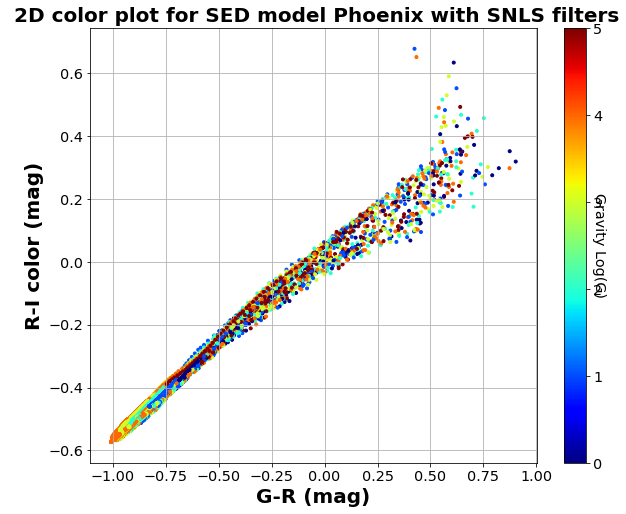

In [32]:
plt.figure(figsize=(10,8))
plt.scatter(G_R[datamag_index], R_I[datamag_index],c=all_gravity,marker='.',cmap='jet' )
cbar=plt.colorbar()
plt.grid()
xtitle='G-R (mag)'
ytitle='R-I color (mag)'
title=' 2D color plot for SED model Phoenix with SNLS filters'
plt.xlabel(xtitle,fontsize=20,weight='bold')
plt.ylabel(ytitle,fontsize=20,weight='bold')        
plt.title(title,fontsize=20,weight='bold')  
#cbar.ax.set_yticklabels([500.,1000.,])
cbar.set_label('Gravity Log(G)', rotation=270)

# put the major ticks at the middle of each cell

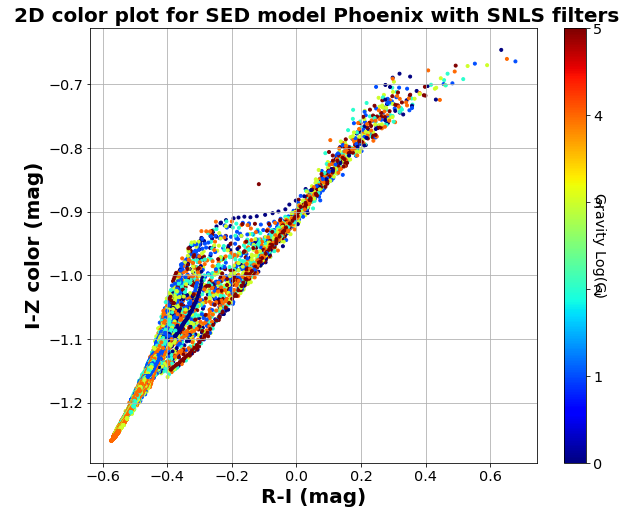

In [33]:
plt.figure(figsize=(10,8))
plt.scatter(R_I[datamag_index], I_Z[datamag_index],c=all_gravity,marker='.',cmap='jet' )
cbar=plt.colorbar()
plt.grid()
xtitle='R-I (mag)'
ytitle='I-Z color (mag)'
title=' 2D color plot for SED model Phoenix with SNLS filters'
plt.xlabel(xtitle,fontsize=20,weight='bold')
plt.ylabel(ytitle,fontsize=20,weight='bold')        
plt.title(title,fontsize=20,weight='bold')  
#cbar.ax.set_yticklabels([500.,1000.,])
cbar.set_label('Gravity Log(G)', rotation=270)

# put the major ticks at the middle of each cell

### Metallicity plot

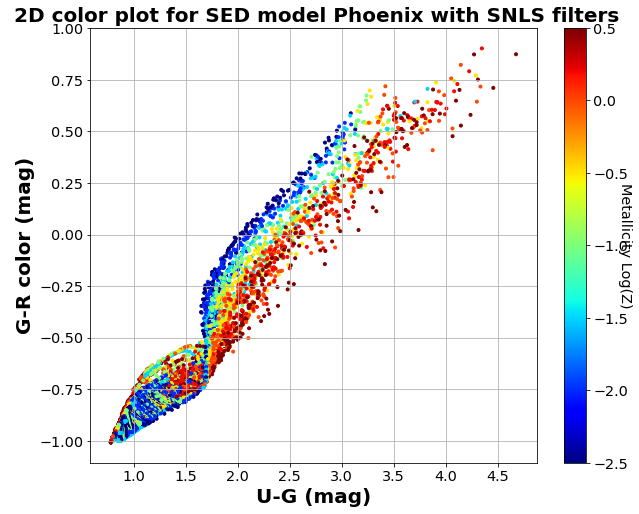

In [34]:
plt.figure(figsize=(10,8))
plt.scatter(U_G[datamag_index], G_R[datamag_index],c=all_metallicity,marker='.',cmap='jet' )
cbar=plt.colorbar()
plt.grid()
xtitle='U-G (mag)'
ytitle='G-R color (mag)'
title=' 2D color plot for SED model Phoenix with SNLS filters'
plt.xlabel(xtitle,fontsize=20,weight='bold')
plt.ylabel(ytitle,fontsize=20,weight='bold')        
plt.title(title,fontsize=20,weight='bold')  
#cbar.ax.set_yticklabels([500.,1000.,])
cbar.set_label('Metallicity Log(Z)', rotation=270)

# put the major ticks at the middle of each cell

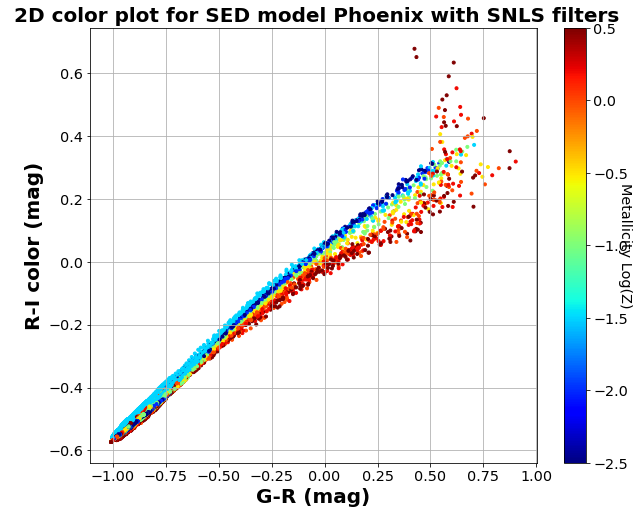

In [35]:
plt.figure(figsize=(10,8))
plt.scatter(G_R[datamag_index], R_I[datamag_index],c=all_metallicity,marker='.',cmap='jet' )
cbar=plt.colorbar()
plt.grid()
xtitle='G-R (mag)'
ytitle='R-I color (mag)'
title=' 2D color plot for SED model Phoenix with SNLS filters'
plt.xlabel(xtitle,fontsize=20,weight='bold')
plt.ylabel(ytitle,fontsize=20,weight='bold')        
plt.title(title,fontsize=20,weight='bold')  
#cbar.ax.set_yticklabels([500.,1000.,])
cbar.set_label('Metallicity Log(Z)', rotation=270)

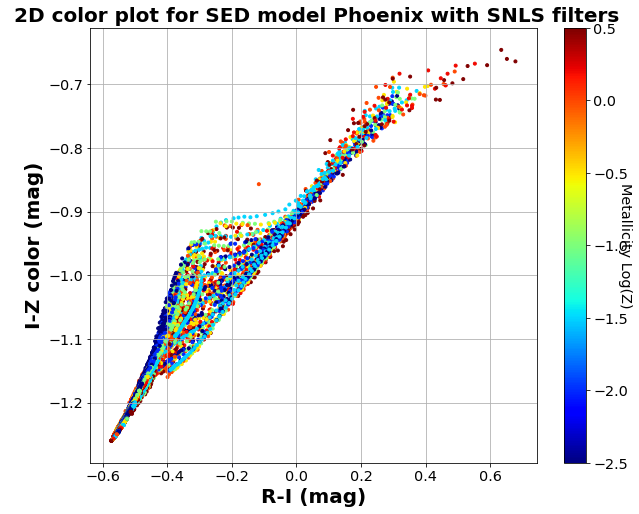

In [36]:
plt.figure(figsize=(10,8))
plt.scatter(R_I[datamag_index], I_Z[datamag_index],c=all_metallicity,marker='.',cmap='jet' )
cbar=plt.colorbar()
plt.grid()
xtitle='R-I (mag)'
ytitle='I-Z color (mag)'
title=' 2D color plot for SED model Phoenix with SNLS filters'
plt.xlabel(xtitle,fontsize=20,weight='bold')
plt.ylabel(ytitle,fontsize=20,weight='bold')        
plt.title(title,fontsize=20,weight='bold')  
#cbar.ax.set_yticklabels([500.,1000.,])
cbar.set_label('Metallicity Log(Z)', rotation=270)